In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow.keras import layers


In [7]:
data_train_path = r'C:\Users\Nesty\LemonvsOrange\Dataset\train'
data_test_path = r'C:\Users\Nesty\LemonvsOrange\Dataset\test'
data_val_path = r'C:\Users\Nesty\LemonvsOrange\Dataset\validation'

In [9]:
img_width = 180
img_height =180 

In [11]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 4222 files belonging to 4 classes.


In [13]:
data_cat = data_train.class_names

In [15]:
data_cat

['lemon', 'lime', 'mandarine', 'orange']

In [17]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 4211 files belonging to 4 classes.


In [19]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 4211 files belonging to 4 classes.


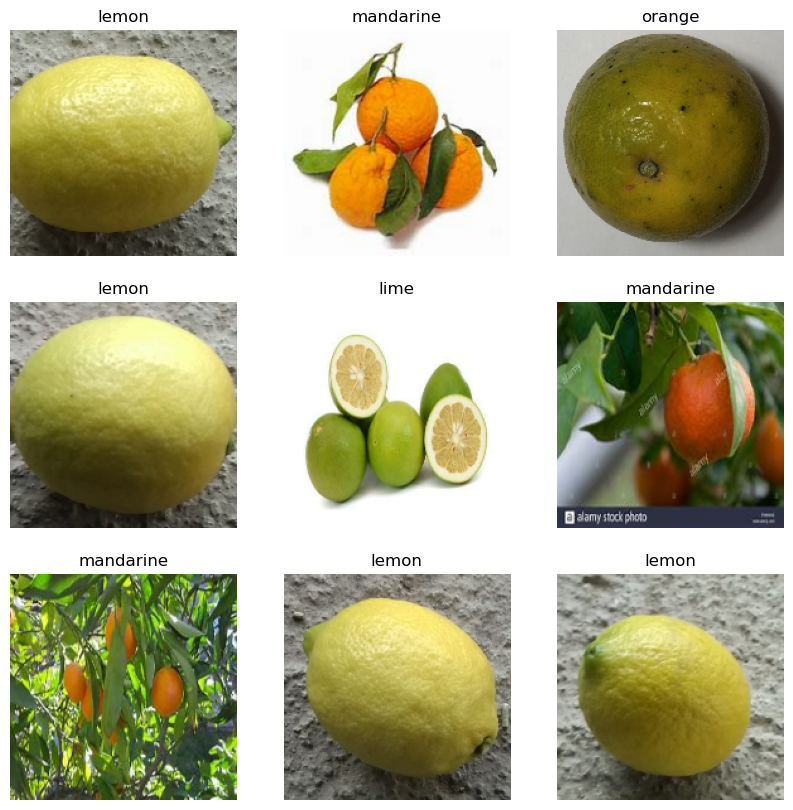

In [21]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [23]:
from tensorflow.keras.models import Sequential

In [25]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
for images, labels in data_train.take(1):
    print("Shape of one batch of images:", images.shape)
    print("Shape of one batch of labels:", labels.shape)


Shape of one batch of images: (32, 180, 180, 3)
Shape of one batch of labels: (32,)


In [29]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])

data_train = data_train.map(lambda x, y: (data_augmentation(x, training=True), y))

model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Input layer
    layers.Rescaling(1./255),  # Normalisasi data

    # Layer convolutional 1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Layer convolutional 2
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Layer convolutional 3
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Layer convolutional 4
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Layer convolutional 5
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Layer convolutional 6
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Layer convolutional 7
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Flatten layer
    layers.Flatten(),

    # Dropout untuk regularisasi
    layers.Dropout(0.5),

    # Fully connected layer
    layers.Dense(256, activation='relu'),  # Fully connected layer dengan 256 neuron
    layers.Dense(len(data_cat), activation='softmax')  # Output layer
])


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,064,932 (15.51 MB)

 Trainable params: 4,064,932 (15.51 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet')

base_model.trainable = False  

model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax') 
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


C:\Users\Nesty\AppData\Local\Temp\ipykernel_36232\2209686487.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
epochs_size = 50
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Pelatihan model
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 82s 600ms/step - accuracy: 0.6890 - loss: 0.8329 - val_accuracy: 0.8107 - val_loss: 0.4337
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 600ms/step - accuracy: 0.8371 - loss: 0.4236 - val_accuracy: 0.8699 - val_loss: 0.3276
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 596ms/step - accuracy: 0.8420 - loss: 0.4023 - val_accuracy: 0.8483 - val_loss: 0.3572
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 78s 595ms/step - accuracy: 0.8585 - loss: 0.3631 - val_accuracy: 0.8870 - val_loss: 0.2867
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 78s 590ms/step - accuracy: 0.8498 - loss: 0.3673 - val_accuracy: 0.8651 - val_loss: 0.3242
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 82s 621ms/step - accuracy: 0.8647 - loss: 0.3344 - val_accuracy: 0.8354 - val_loss: 0.3823
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 81s 617ms/step - accuracy: 0.8716 - loss: 0.3399 - val_accuracy: 0.8912 - val_loss: 0.2842
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 598ms/step - accuracy: 0.8831 - loss: 0

Text(0.5, 1.0, 'Loss')

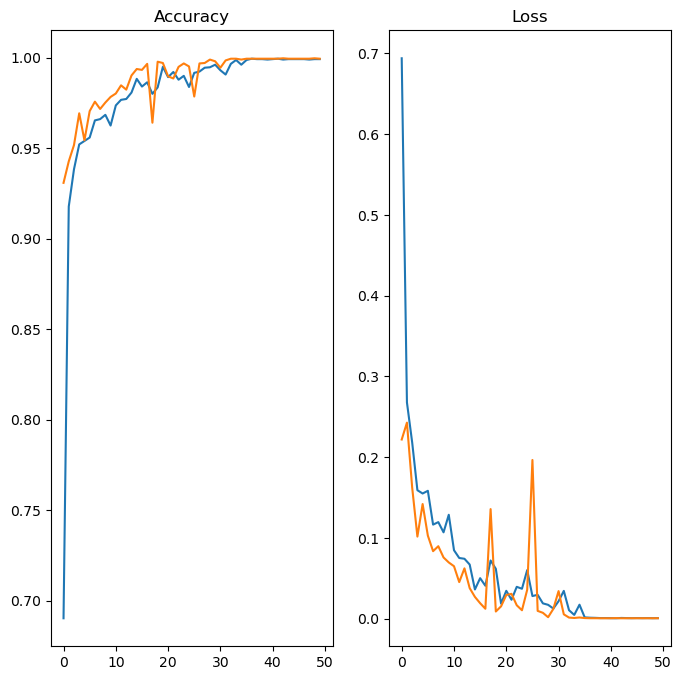

In [41]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [69]:
image = 'mandarin.jpg'

image = tf.keras.utils.load_img(image, target_size=(img_height, img_width)) 
img_arr = tf.keras.utils.img_to_array(image) / 255.0  
img_bat = tf.expand_dims(img_arr, 0)  

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)

print('Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))


In [71]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [73]:
score = tf.nn.softmax(predict)

In [75]:
print('Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Fruit in image is mandarine with accuracy of 47.54


In [51]:
model.save('Image_classify.keras')